<a href="https://colab.research.google.com/github/FanusArefaine/Natural-Language-Processing/blob/main/NLP_Text_Classification_Disaster_or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from collections import Counter 

### **Importing Training and Testing Dataset**

In [8]:
train_df = pd.read_csv('Datasets/train.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
test_df = pd.read_csv('Datasets/test.csv')
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


#### **Feature Exploration**

In [10]:
print("Dimensions of training dataset: ", train_df.shape)
print("Dimensions of testing dataset: ", test_df.shape)

Dimensions of training dataset:  (7613, 5)
Dimensions of testing dataset:  (3263, 4)


In [11]:
# Distribution of target variable in training dataset [BALANCED OR NOT]

# As observed below, the dataset is moderately balanced

disaster_tweets = train_df[train_df['target']==1].shape[0]
not_disaster_tweets = train_df.shape[0] - disaster_tweets

print(f'Percentage of distaster tweets: {round(((disaster_tweets/train_df.shape[0])*100),2)}%')
print(f'Percentage of not distaster tweets: {round(((not_disaster_tweets/train_df.shape[0])*100),2)}%')

Percentage of distaster tweets: 42.97%
Percentage of not distaster tweets: 57.03%


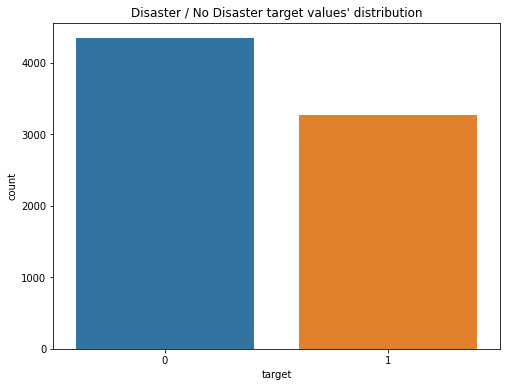

In [12]:
# plotting distribution of the target variable 

plt.figure(figsize=(8,6))
sns.countplot(x='target', data=train_df) 

plt.title("Disaster / No Disaster target values' distribution")
plt.show()

In [13]:
# Checking the training dataset for null values 

# Location has significant amount of missing values and keyword also has some missing values as shown below

train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [14]:
# Checking the testing dataset for null values 

# Same as the training dataset, the testing dataset has a signigincant amount of missing location feature values and also some missing values on the keyword feature 

test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

**Due to missing Values. . .**


     'location' feature can be dropped due to high percentage of missing values. 

     'keyword' feature will be further analyzed for validation and potential for classifiying targets better

  

In [15]:
#Dropping location feature in both training and testing datasets 

train_df.drop(['location'], axis=1, inplace=True)
test_df.drop(['location'], axis=1, inplace=True)

In [16]:
# Disaster tweets' keywords

train_df[train_df['target']==1].groupby('keyword').count()

,id,text,target
keyword,,,
ablaze,13,13,13
accident,24,24,24
airplane%20accident,30,30,30
ambulance,20,20,20
annihilated,11,11,11
...,...,...,...
wounded,26,26,26
wounds,10,10,10
wreck,7,7,7


In [17]:
# exracting disaster and not disaster keywords

not_disaster_keys = train_df[train_df['target']==0]['keyword'].tolist()
disaster_keys = train_df[train_df['target']==1]['keyword'].tolist()

In [18]:
from collections import Counter 

# Keyword frequencies in disaster and not disaster tweets 

not_disaster_keys_counts_sorted = (Counter(not_disaster_keys)).most_common()
disaster_keys_counts_sorted = (Counter(disaster_keys)).most_common()

In [19]:
# Top 20 most common keywords in not disaster tweets 

not_disaster_keys_counts_sorted[:20]

[('body%20bags', 40),
 ('armageddon', 37),
 ('harm', 37),
 ('deluge', 36),
 ('ruin', 36),
 ('wrecked', 36),
 ('explode', 35),
 ('fear', 35),
 ('siren', 35),
 ('twister', 35),
 ('aftershock', 34),
 ('panic', 34),
 ('screaming', 34),
 ('blaze', 33),
 ('blazing', 33),
 ('blizzard', 33),
 ('crush', 33),
 ('sinking', 33),
 ('traumatised', 33),
 ('bloody', 32)]

In [20]:
# Top 20 most common keywords in disaster tweets 

disaster_keys_counts_sorted[:20]

[(nan, 42),
 ('derailment', 39),
 ('outbreak', 39),
 ('wreckage', 39),
 ('debris', 37),
 ('oil%20spill', 37),
 ('typhoon', 37),
 ('evacuated', 32),
 ('rescuers', 32),
 ('suicide%20bomb', 32),
 ('suicide%20bombing', 32),
 ('nuclear%20disaster', 31),
 ('razed', 31),
 ('airplane%20accident', 30),
 ('earthquake', 30),
 ('suicide%20bomber', 30),
 ('bridge%20collapse', 29),
 ('collision', 29),
 ('wildfire', 29),
 ('buildings%20on%20fire', 28)]

In [21]:
# Common keywords in disaster and not disaster tweets 

common_keys = list(set(not_disaster_keys).intersection(set(disaster_keys)))
print(f'Number of common words in disaster and not disaster tweets: {len(common_keys)}\n')
common_keys

Number of common words in disaster and not disaster tweets: 218



[nan,
 'derail',
 'tornado',
 'survive',
 'tsunami',
 'danger',
 'wrecked',
 'evacuate',
 'stretcher',
 'rescuers',
 'obliteration',
 'hijack',
 'riot',
 'military',
 'trouble',
 'deaths',
 'hostages',
 'drowning',
 'burning',
 'famine',
 'evacuated',
 'devastated',
 'body%20bag',
 'buildings%20burning',
 'body%20bagging',
 'engulfed',
 'survivors',
 'tragedy',
 'cliff%20fall',
 'damage',
 'annihilation',
 'mass%20murderer',
 'casualties',
 'structural%20failure',
 'snowstorm',
 'desolate',
 'curfew',
 'harm',
 'collide',
 'windstorm',
 'fear',
 'wounds',
 'crushed',
 'obliterate',
 'bioterror',
 'rainstorm',
 'dead',
 'burned',
 'fire%20truck',
 'quarantined',
 'mass%20murder',
 'detonation',
 'survived',
 'evacuation',
 'burning%20buildings',
 'detonate',
 'apocalypse',
 'injured',
 'bridge%20collapse',
 'explode',
 'chemical%20emergency',
 'bombing',
 'bombed',
 'annihilated',
 'sinking',
 'lava',
 'seismic',
 'flooding',
 'hail',
 'buildings%20on%20fire',
 'suicide%20bomb',
 'hosta

In [22]:
# Checking how many times the above common words appeared in non disaster tweets 

not_disaster_common_keys = sum([1 for word in not_disaster_keys if word in common_keys])
print(f'There is an occurence of {not_disaster_common_keys} common keywords out of total {len(not_disaster_keys)} not disaster keywords.')

There is an occurence of 4308 common keywords out of total 4342 not disaster keywords.


In [23]:
# Checking how many times the above common words appeared in disaster tweets 


disaster_common_keys = sum([1 for word in disaster_keys if word in common_keys])
print(f'There is an occurence of {disaster_common_keys} common keywords out of total {len(disaster_keys)} disaster keywords.')

There is an occurence of 3156 common keywords out of total 3271 disaster keywords.


#### **As shown above . . .**


      Disaster and Not disaster tweets share most of the keywords. 

      Keeping the keywords might otherwise mislead the classification algorithm. 

      Hence, dropping the 'keyword' feature would be a wise idea.



In [24]:
# Dropping tweets with missing 'keyword' feature

train_df.drop(['keyword'], axis=1, inplace=True)
test_df.drop(['keyword'], axis=1, inplace=True)

In [25]:
# Training and Testing 'id' will be handy for submission, hence it is wise to save 'id' at this section and focus on the 'text' feature

train_id = train_df['id']
test_id = test_df['id']


# Dropping 'id' feature 

train_df.drop(['id'], axis=1, inplace=True)
test_df.drop(['id'], axis=1, inplace=True)

In [26]:
train_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [27]:
test_df.head()

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


## **Feature Creation** 


      In the following section, I will create more features that have better potential to classify the target

            - Features that can be derived from the 'text' feature include:

                + Word Count 
                + Unique Word Count 
                + Character Count 
                + Stopword Count 
                + Punctuation Count 
                + Mean Word Length 
                + Mention Count 
                + URL Count 
                + Hashtag Count 


In [28]:
def distribution_plot(df, feature_name):
    plt.subplots(figsize=(10,6))

    """
        A function to plot distribution of a feature
        against the target values for comparison.

        df: input dataframe 

        feature_name: input name of the feature to plot 
        against the target value

        output of the function is a plot
    """
    
    sns.set_theme()

    ax = sns.distplot(df[feature_name][df['target']==0], color='green', label='Not a disaster tweet')
    ax = sns.distplot(df[feature_name][df['target']==1], color='blue', label='Disaster tweet')
    plt.title("Training Dataset " + feature_name + " Distribution")
    plt.legend()
    plt.show()


##### **Word Count**

In [29]:
# Word count implementation and applying to the train and testing dfs

def word_count(df):
  df['word_count'] = [len(sentence.lower().split()) for sentence in df['text']]
  return df


train_df = word_count(train_df)
test_df = word_count(test_df)

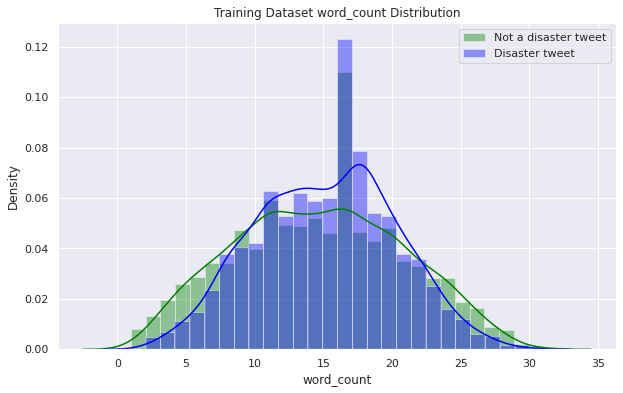

In [34]:
# word count distribution against target in train dataset 
distribution_plot(train_df, 'word_count')

#### **Unique Word Count**

In [35]:
# Creating unique word count feature in training and testing datasets 

def unique_word_count(df):
  df['unique_word_count'] = [len(set(sentence.lower().split())) for sentence in df['text']]
  return df


train_df = unique_word_count(train_df)
test_df = unique_word_count(test_df)

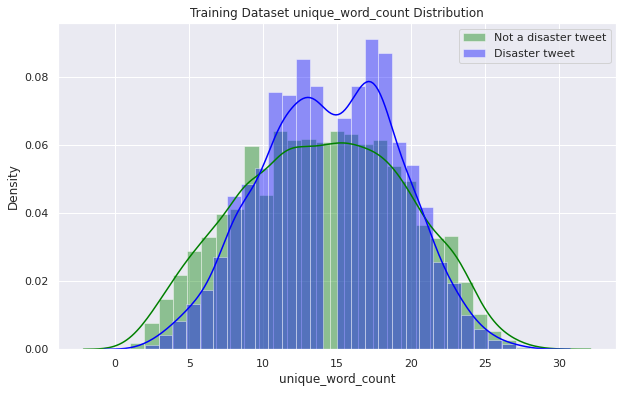

In [36]:
# unique word count distribution against target in train dataset 
distribution_plot(train_df, 'unique_word_count')

#### **Character Count**

In [37]:
# Creating a 'character count' feature 

def character_count(df):
  df['character_count'] = [len(str(sentence.lower())) for sentence in df['text']]
  return df 


train_df = character_count(train_df)
test_df = character_count(test_df)

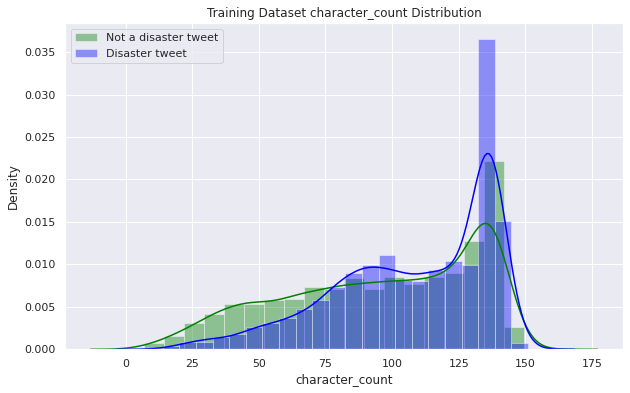

In [38]:
# distribution of character count against target in train dataset 

distribution_plot(train_df, 'character_count')

#### **Stopword Count**

In [39]:
import nltk 
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
# Creating 'stopword count' feature in the dataframe 

def stopword_count(df):
  df['stopword_count'] = df['text'].apply(lambda s: len([k for k in str(s).lower().split() if k in stopwords.words('english')]))
  return df 


train_df = stopword_count(train_df)
test_df = stopword_count(test_df)

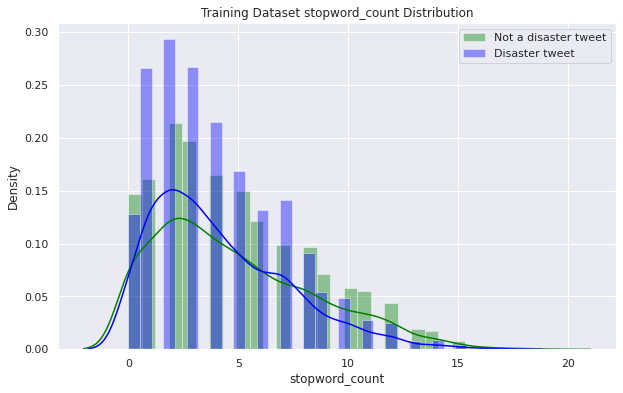

In [41]:
# Distribution of stopwords count against the target feature in train dataset 

distribution_plot(train_df, 'stopword_count')

#### **Punctuation Count**

In [42]:
# Creating 'punctuation count' feature in the dataframe 
import string 

def punctuation_count(df):
  df['punctuation_count'] = df['text'].apply(lambda s: len([k for k in str(s) if k in string.punctuation]))
  return df 


train_df = punctuation_count(train_df)
test_df = punctuation_count(test_df)

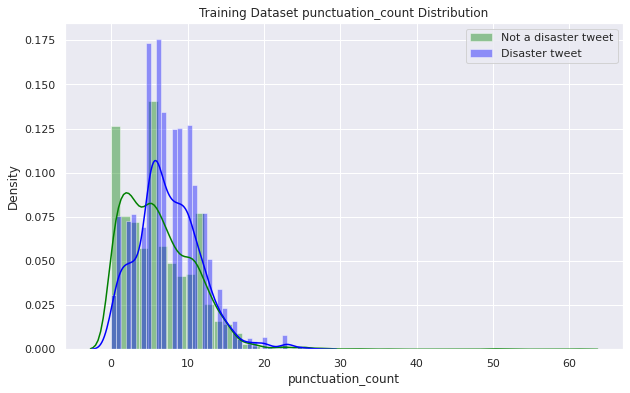

In [43]:
# Distribution of punctuation count against target feature in training dataset 

distribution_plot(train_df, 'punctuation_count')

#### **Mean Word Length** 


In [44]:
# Creating 'mean word length' feature in the dataframe 

def mean_word_length(df):
  df['mean_word_length'] = df['text'].apply(lambda s: np.mean([len(word) for word in str(s).split()]))
  return df
  

train_df = mean_word_length(train_df)
test_df = mean_word_length(test_df)

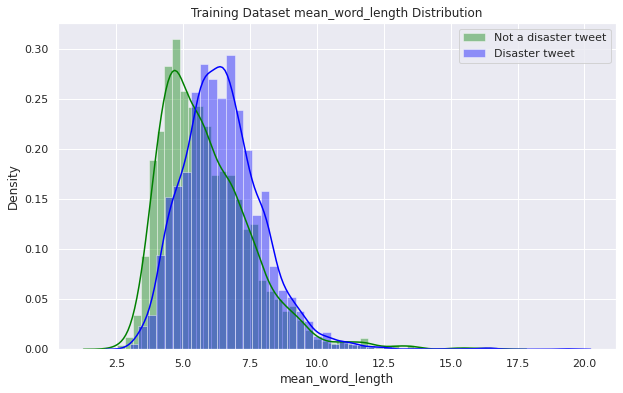

In [45]:
# Distribution of mean word length against the target feature in training dataset 

distribution_plot(train_df, 'mean_word_length')

#### **Mention Count**

In [46]:
# Creating mention count feature 

def mention_count(df):
  df['mention_count'] = df['text'].apply(lambda s: len([k for k in str(s) if k=='@']))
  return df 


train_df = mention_count(train_df)
test_df = mention_count(test_df)

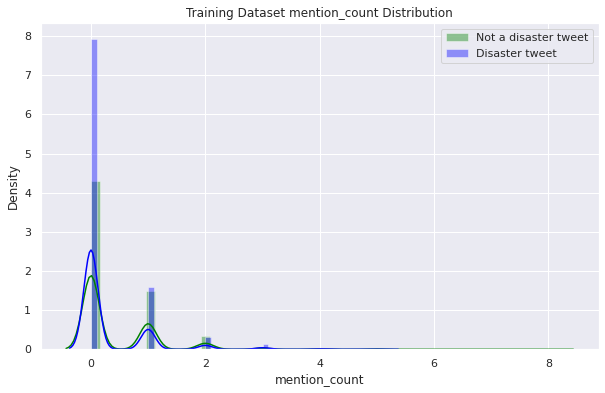

In [47]:
# Distribution of mention count against target variable in training data 

distribution_plot(train_df, 'mention_count')

#### **URL Count**

In [48]:
# Creating URL Count feature 

def url_count(df):
  df['url_count'] = df['text'].apply(lambda s: len([k for k in str(s).lower().split() if 'http' in k or 'https' in k]))
  return df 

train_df = url_count(train_df)
test_df = url_count(test_df)

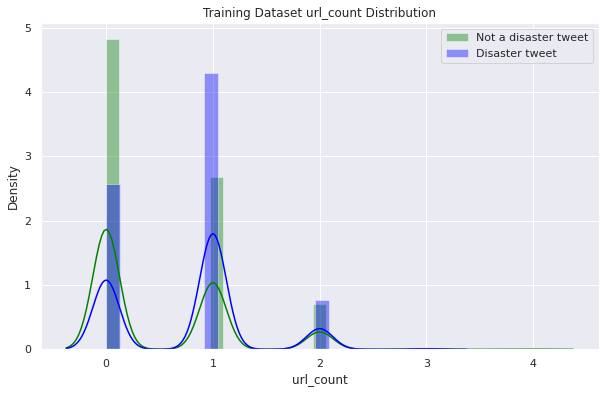

In [49]:
# Distribution of url count against target variable in training dataset 

distribution_plot(train_df, 'url_count')

#### **Hashtag Count**

In [50]:
# Creating hashtag count feature 

def hashtag_count(df):
  df['hashtag_count'] = df['text'].apply(lambda s: len([k for k in str(s) if k=='#']))
  return df 


train_df = hashtag_count(train_df)
test_df = hashtag_count(test_df)

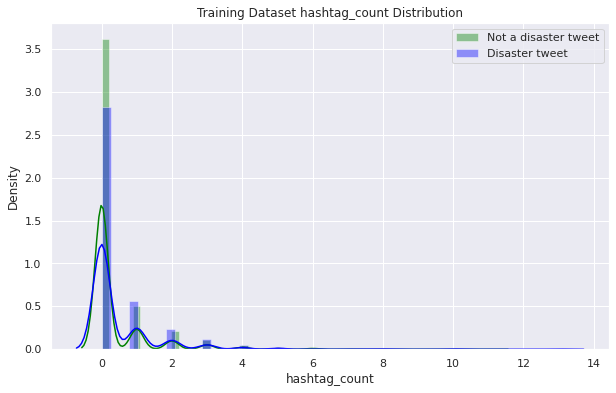

In [51]:
# Distribution of hashtag count against the target feature in training dataset 

distribution_plot(train_df, 'hashtag_count')

## **Text Data Cleaning**


      In this section of cleaning text data, I will make the following procedures.

            + Fix abbreviations 
            + Remove punctuation 
            + Remove stopwords 
            + Remove words with less characters 
            + Lemmatize words 
        



#### **Removing Abbreviations**

In [52]:
# Fixing abbreviations from a custom build function 
import textClean as tc

# Checking the cleaning function 
tweet = "I'm can't ain't didn't"

print(f'Raw text: {tweet}')
print(f'Cleaned text: {tc.clean(tweet)}')

Raw text: I'm can't ain't didn't
Cleaned text: I am cannot am not did not


In [53]:
# Applying the custom function to train and test datasets 

train_cleaned = train_df['text'].apply(tc.clean)
test_cleaned = test_df['text'].apply(tc.clean)

In [54]:
# text cleaned and returned as pandas Series datatype
type(train_cleaned)

pandas.core.series.Series

In [55]:
# Converting Series into Pandas dataframe 

train_cleaned = pd.DataFrame(train_cleaned, columns=['text'])
test_cleaned = pd.DataFrame(test_cleaned, columns=['text'])

In [56]:
train_cleaned.head()

,text
0,Our Deeds are the Reason of this # earthquake...
1,Forest fire near La Ronge Sask . Canada
2,All residents asked to ' shelter in place ' ...
3,"13,000 people receive # wildfires evacuation ..."
4,Just got sent this photo from Ruby # Alaska a...


#### **To Lowercase**

In [57]:
train_cleaned['text'] = train_cleaned['text'].apply(lambda s: s.lower())
test_cleaned['text'] = test_cleaned['text'].apply(lambda s: s.lower())

#### **Remove URL**

In [58]:
import re
def remove_url(df):
  df['text'] = df['text'].apply(lambda s: re.sub(r'https?://\S+|www\.\S+', '', s, flags = re.MULTILINE))
  return df 

train_cleaned = remove_url(train_cleaned)
test_cleaned = remove_url(test_cleaned)

#### **Remove Punctuation** 

In [59]:
def remove_punctuation(df):
  df['text'] = df['text'].apply(lambda s: s.translate(str.maketrans('', '', string.punctuation)))
  return df 

train_cleaned = remove_punctuation(train_cleaned)
test_cleaned = remove_punctuation(test_cleaned)

#### **Remove Stopwords**

In [60]:
def remove_stopwords(df):
  df['text'] = df['text'].apply(lambda s: ' '.join([k for k in str(s).split() if k not in stopwords.words('english')]))
  return df 

train_cleaned = remove_punctuation(train_cleaned)
test_cleaned = remove_punctuation(test_cleaned)

#### **Remove words of length 2 or shorter**

In [61]:
def remove_short_words(df):
  df['text'] = df['text'].apply(lambda s: ' '.join([word for word in str(s).split() if len(word)>2]))
  return df 

train_cleaned = remove_short_words(train_cleaned)
test_cleaned = remove_short_words(test_cleaned)

#### **Remove Non Alphabets**

In [62]:
def remove_non_alphabets(df):
  df['text'] = df['text'].apply(lambda s: ' '.join([word for word in s.split() if word.isalpha() == True or word != None]))
  return df 

train_cleaned = remove_non_alphabets(train_cleaned)
test_cleaned = remove_non_alphabets(test_cleaned)

#### **Lemmatization**

In [63]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [64]:
from nltk.stem import WordNetLemmatizer

def lemmatize_words(df):
  lemmatizer = WordNetLemmatizer()
  df['text'] = df['text'].apply(lambda s: lemmatizer.lemmatize(s))
  return df 

train_cleaned = lemmatize_words(train_cleaned)
test_cleaned = lemmatize_words(test_cleaned)

In [65]:
# Checking training dataset 

train_cleaned.head()

,text
0,our deeds are the reason this earthquake may a...
1,forest fire near ronge sask canada
2,all residents asked shelter place are being no...
3,13000 people receive wildfires evacuation orde...
4,just got sent this photo from ruby alaska smok...


In [66]:
# Checking testing dataset 

test_cleaned.head()

,text
0,just happened terrible car crash
1,heard about earthquake different cities stay s...
2,there forest fire spot pond geese are fleeing ...
3,apocalypse lighting spokane wildfires
4,typhoon soudelor kills china and taiwan


##  **Tokenization**

In [67]:
# Using Keras API for tokenization 

from tensorflow.keras.preprocessing.text import Tokenizer

# Creating tokenizer object 
token = Tokenizer()

# list of sentences --> training dataset 
text = train_cleaned['text'].to_list()
text[:4]

['our deeds are the reason this earthquake may allah forgive all',
 'forest fire near ronge sask canada',
 'all residents asked shelter place are being notified officers other evacuation shelter place orders are expected',
 '13000 people receive wildfires evacuation orders california']

In [68]:
# Applying tokenization to clean training dataset 
token.fit_on_texts(text)

# Vocabulary length 
vocab_size = len(token.word_index) + 1 
vocab_size

16435

In [69]:
# Converting the indexed word vocabularies to sequence of indices of words
text_encode = token.texts_to_sequences(text) 

print(text_encode[:5])

[[84, 4247, 8, 1, 776, 9, 212, 105, 1491, 4248, 18], [154, 20, 191, 6275, 6276, 1118], [18, 1614, 1492, 1795, 616, 8, 100, 6277, 1615, 336, 213, 1795, 616, 1291, 8, 1008], [2706, 33, 4249, 1386, 213, 1291, 58], [15, 70, 1119, 9, 291, 11, 6278, 1796, 226, 11, 1386, 6279, 41, 150]]


In [93]:
max_sent_length = 0
for sentence in text_encode:
  if len(sentence) > max_sent_length:
    max_sent_length = len(sentence)
max_sent_length

25

In [94]:
# Padding the sequences so that they have the same sequence length 

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 25
X = pad_sequences(text_encode, maxlen=max_length, padding='post')

In [95]:
# Same length sequences, X

print(X)

[[  84 4247    8 ...    0    0    0]
 [ 154   20  191 ...    0    0    0]
 [  18 1614 1492 ...    0    0    0]
 ...
 [ 686 1480  500 ...    0    0    0]
 [  46 1048   22 ...    0    0    0]
 [   1  168   30 ...    0    0    0]]


In [96]:
X.shape

(7613, 25)

### **Word Embedding - GLoVe**

In [75]:
# Dowloading twitter glove vectors 

!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip 

--2021-03-18 21:05:43--  http://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.twitter.27B.zip [following]
--2021-03-18 21:05:43--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2021-03-18 21:05:43--  http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [appli

In [80]:
!unzip glove*.zip

Archive:  glove.twitter.27B.zip
  inflating: glove.twitter.27B.25d.txt  
  inflating: glove.twitter.27B.50d.txt  
replace glove.twitter.27B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace glove.twitter.27B.200d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: glove.twitter.27B.200d.txt  y



In [82]:
ls

 Datasets/                    glove.twitter.27B.zip
 FeatureCreation.py          'NLP Text Classification - Disaster or Not.ipynb'
 glove.twitter.27B.100d.txt   __pycache__/
 glove.twitter.27B.200d.txt   textClean.py
 glove.twitter.27B.25d.txt    vizualization.py
 glove.twitter.27B.50d.txt


In [84]:
# Building a word to vector dictionary 

glove_vect = dict()

file = open("glove.twitter.27B.200d.txt", 'r', encoding='utf-8')

for line in file:
  values  = line.split()
  word = values[0]
  vector = np.asarray(values[1:])
  glove_vect[word] = vector
file.close()


# Number of words in glove vect dictionary 
len(glove_vect.keys())

1193514

In [85]:
# Checking vector size of each word in the glove dictionary 
vec_size = glove_vect.get('you').shape[0]
vec_size

200

In [86]:
# Printing the weights of a word in the dictionary 
glove_vect.get('you')

array(['0.1964', '0.67153', '0.0062976', '0.25359', '-0.42097', '0.3849',
       '1.0378', '-0.18536', '-0.054244', '-0.10856', '0.12146',
       '0.047692', '-0.93228', '-0.27192', '-0.3506', '0.11069',
       '-0.055099', '-0.079658', '0.011767', '0.14395', '-0.025917',
       '-0.18253', '0.025691', '0.19619', '0.10334', '1.0731', '0.41992',
       '0.17083', '0.91596', '-0.43398', '0.16464', '0.012715',
       '0.095477', '0.1449', '-0.29652', '-0.10642', '0.098389',
       '0.17937', '0.23289', '-0.22209', '0.08777', '-0.18005', '0.38678',
       '-0.032059', '0.1202', '-0.41741', '0.26827', '-0.19769',
       '0.021976', '-0.23585', '0.14789', '0.10173', '-0.1038',
       '-0.31954', '0.63308', '-0.051142', '-0.053209', '0.29378',
       '-0.054395', '4.3346e-05', '0.25585', '-0.18048', '-0.2703',
       '0.0077783', '0.63585', '0.14869', '-0.10854', '-0.24726',
       '-0.10869', '-0.24147', '0.28059', '0.13645', '-0.03561',
       '-0.68258', '0.11957', '0.011085', '-0.013771',

In [97]:
# input words along with indices 

input_words = token.word_index.items()
input_words 

dict_items([('the', 1), ('and', 2), ('you', 3), ('for', 4), ('not', 5), ('that', 6), ('with', 7), ('are', 8), ('this', 9), ('have', 10), ('from', 11), ('was', 12), ('like', 13), ('will', 14), ('just', 15), ('but', 16), ('your', 17), ('all', 18), ('out', 19), ('fire', 20), ('has', 21), ('after', 22), ('when', 23), ('news', 24), ('they', 25), ('get', 26), ('new', 27), ('now', 28), ('what', 29), ('more', 30), ('via', 31), ('about', 32), ('people', 33), ('one', 34), ('how', 35), ('been', 36), ('who', 37), ('there', 38), ('over', 39), ('would', 40), ('into', 41), ('video', 42), ('can', 43), ('disaster', 44), ('emergency', 45), ('police', 46), ('than', 47), ('off', 48), ('storm', 49), ('her', 50), ('were', 51), ('time', 52), ('body', 53), ('his', 54), ('some', 55), ('still', 56), ('year', 57), ('california', 58), ('malaysia', 59), ('burning', 60), ('crash', 61), ('back', 62), ('suicide', 63), ('day', 64), ('why', 65), ('man', 66), ('them', 67), ('2015', 68), ('love', 69), ('got', 70), ('know

In [98]:
# Preparing word vector matrix for the input text 


# Creating vectorization matrix for input text 
word_vector_matrix = np.zeros((vocab_size, vec_size))


# Filling up the vectorization matrix from glove vectors 
for word, index in input_words:
  vector = glove_vect.get(word)
  if vector is not None:
    word_vector_matrix[index] = vector 
    

In [99]:
# Input data --> text as indices 

X_df = pd.DataFrame(data=X)
X_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,84,4247,8,1,776,9,212,105,1491,4248,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,154,20,191,6275,6276,1118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18,1614,1492,1795,616,8,100,6277,1615,336,213,1795,616,1291,8,1008,0,0,0,0,0,0,0,0,0
3,2706,33,4249,1386,213,1291,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,15,70,1119,9,291,11,6278,1796,226,11,1386,6279,41,150,0,0,0,0,0,0,0,0,0,0,0


In [104]:
# Dataset labels 
train_labels = train_df['target']

### **Model Building**

In [106]:
## Splitting the training and testing dataset 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, train_labels, test_size=0.2, random_state=42, stratify=labels)